Student Performance Indicator

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
#read the dataset
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [8]:
#Check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
#check duplicates
df.duplicated().sum()

0

In [12]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
#check the number of unique values in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
#check statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights or Observation
The following are some insights or observations that can be drawn from the data:
*   From the above description of numerical data; all means are very close to each other- between 66 and 69
*   The standard deviations are also very close to each other- between 14.6 - 15.19
*   While there is minimum of 0 for maths; other having between 17 to 10 value

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
[feature for feature in df.columns if df[feature].dtype == 'O']

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [19]:
#segregate the numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [20]:
numerical_features

['math score', 'reading score', 'writing score']

In [21]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [22]:
#aggregate the total score with mean
df['total_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['average']= df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,24.222222
1,female,group C,some college,standard,completed,69,90,88,82.333333,27.444444
2,female,group B,master's degree,standard,none,90,95,93,92.666667,30.888889
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,16.444444
4,male,group C,some college,standard,none,76,78,75,76.333333,25.444444


<Axes: xlabel='average', ylabel='Count'>

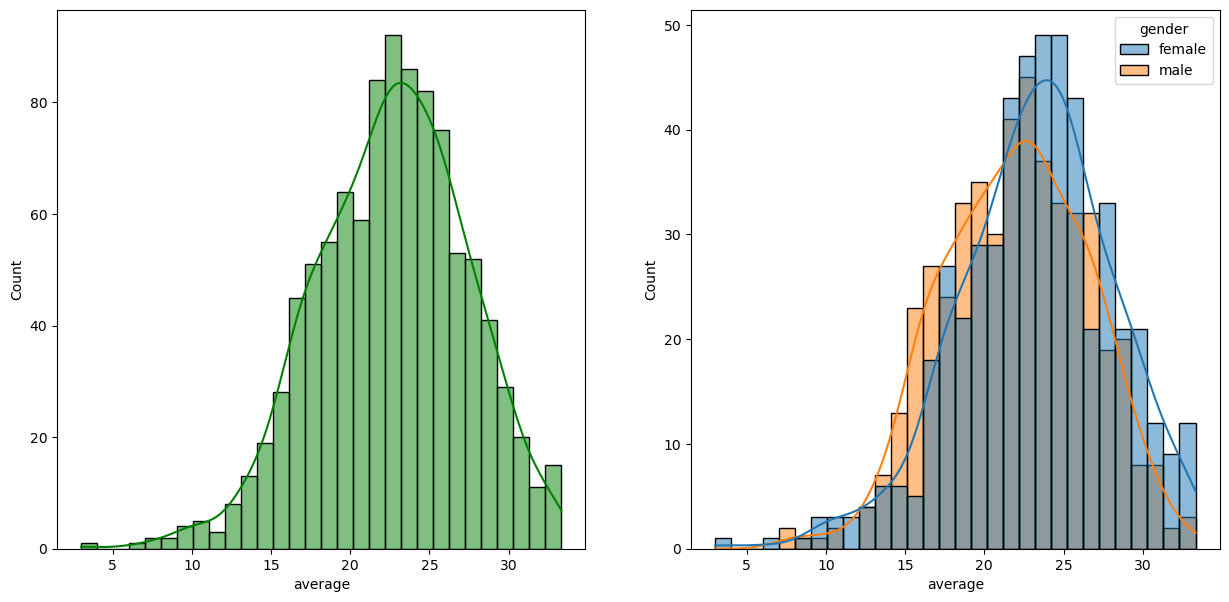

In [24]:
# exploring visulaization
fig,axis = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')

Insights
* Female student tend to perform well then male students

<Axes: xlabel='average', ylabel='Count'>

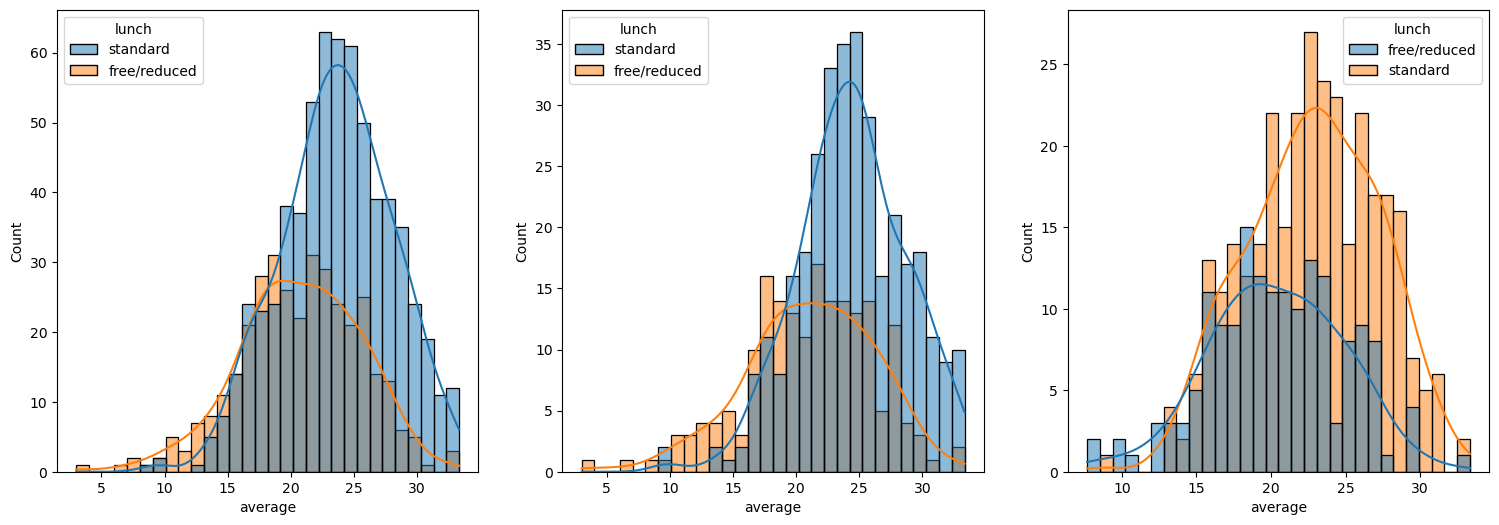

In [27]:
fig,axis = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', bins=30, kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', bins=30, kde=True, hue='lunch')

Insights
* Standard lunch helps students perform well in exams
* Standard lunch helps perform well in exams be it male or female

<Axes: xlabel='average', ylabel='Count'>

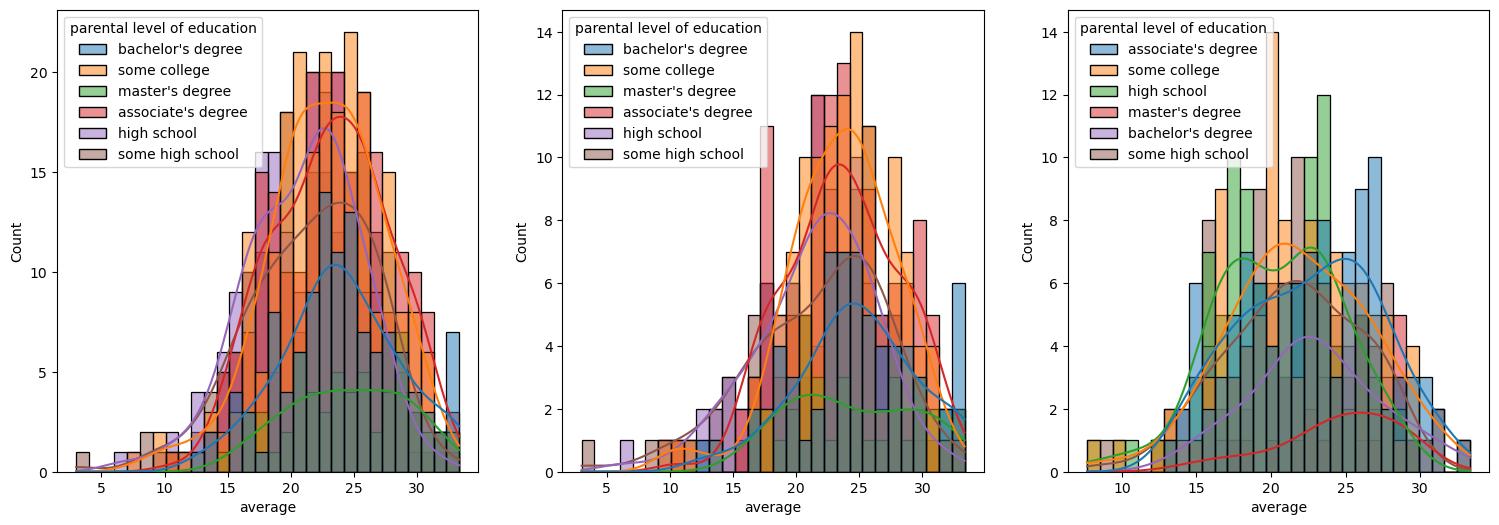

In [28]:
fig,axis = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', bins=30, kde=True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', bins=30, kde=True, hue='parental level of education')

Insights
* In general parents education don't help student perform well in exam
* 3rd plot shows that parent's whose education is associate degree or master's degree their male chlid tend to perform well in exam
* 2nd plot we can see there is no effect of parent's education on female students

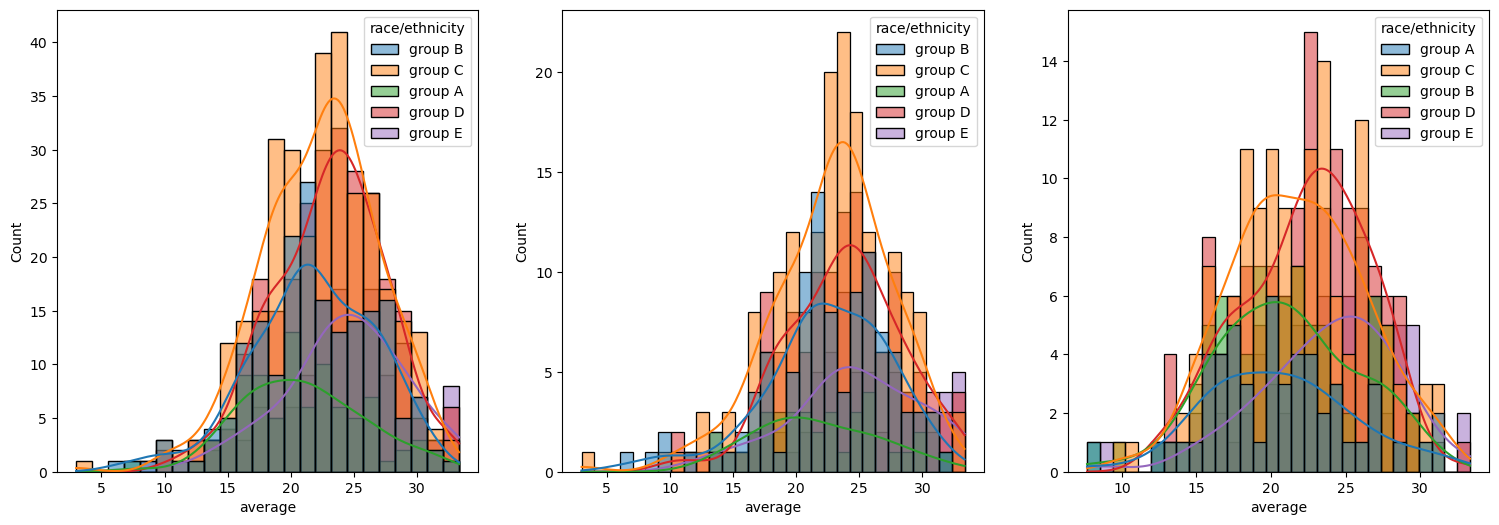

In [32]:
fig,axis = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'female'], x='average', bins=30, kde=True, hue='race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'male'], x='average', bins=30, kde=True, hue='race/ethnicity')
plt.show()

Insights
*  Students of group A and group B tends to perform poorly in exams
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

<Axes: >

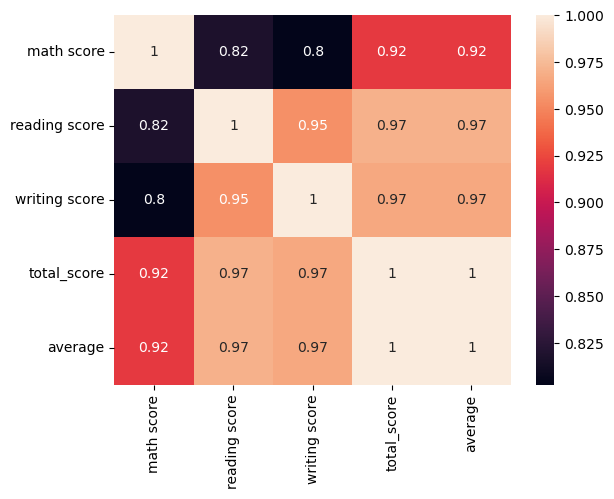

In [33]:
sns.heatmap(df.corr(), annot=True)